At the moment this notebook is not working as expected. I am having trouble consistently extending my predictions to the future.<br>
This is an issue I will fix in the next version of this code.

In [107]:
import pandas as pd
import os.path
import matplotlib.pyplot as plt
import numpy as np

# The below suppresses all warnings in the notebook
# Only leave this uncommented for display purposes
import warnings
warnings.filterwarnings("ignore")

In [108]:
# This is the selected county FIPS which will have the prediction created for it
selected_FIPS = 6081

In [109]:
raw_data_folder = '/Users/bryan/Movies/Data For TDI Project/Raw_Data_County_Level'
file_name = 'County_MedianListingPrice_AllHomes.csv'

In [110]:
list_price_df = pd.read_csv(os.path.join(raw_data_folder,file_name),encoding = "ISO-8859-1")
list_price_df.head(1)

,RegionName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
0,Los Angeles County,CA,Los Angeles-Long Beach-Anaheim,6,37,1,399000.0,389000.0,398884.0,398500.0,...,675000.0,658800.0,659000.0,660000.0,662050.0,659000.0,649999.0,649900.0,650000.0,665000.0


Create a new feature for full FIPS code

In [111]:
list_price_df['FIPS'] = list_price_df.StateCodeFIPS*1000 + list_price_df.MunicipalCodeFIPS
list_price_df.head(100)

,RegionName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,SizeRank,2010-01,2010-02,2010-03,2010-04,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,FIPS
0,Los Angeles County,CA,Los Angeles-Long Beach-Anaheim,6,37,1,399000.0,389000.0,398884.0,398500.0,...,658800.0,659000.0,660000.0,662050.0,659000.0,649999.0,649900.0,650000.0,665000.0,6037
1,Cook County,IL,Chicago-Naperville-Elgin,17,31,2,244900.0,249000.0,249000.0,249000.0,...,289900.0,288828.5,289000.0,285000.0,280000.0,278000.0,280000.0,289900.0,299000.0,17031
2,Harris County,TX,Houston-The Woodlands-Sugar Land,48,201,3,149900.0,152900.0,154755.0,154900.0,...,279950.0,278000.0,279500.0,279000.0,279000.0,275990.0,277019.0,279000.0,279900.0,48201
3,Maricopa County,AZ,Phoenix-Mesa-Scottsdale,4,13,4,179900.0,175900.0,174900.0,169900.0,...,309500.0,308000.0,305866.5,309900.0,308000.0,307900.0,309990.0,310000.0,314900.0,4013
4,San Diego County,CA,San Diego-Carlsbad,6,73,5,399000.0,399000.0,399500.0,399998.0,...,649499.0,649000.0,649000.0,637500.0,635000.0,635000.0,635000.0,639000.0,642700.0,6073
5,Orange County,CA,Los Angeles-Long Beach-Anaheim,6,59,6,550000.0,529000.0,510000.0,519000.0,...,798888.0,787694.0,785000.0,777000.0,773222.0,774764.5,769500.0,775000.0,779900.0,6059
6,Kings County,NY,New York-Newark-Jersey City,36,47,7,459000.0,469000.0,459000.0,459000.0,...,749000.0,739949.5,748000.0,748000.0,730000.0,729000.0,725000.0,728000.0,749000.0,36047
7,Miami-Dade County,FL,Miami-Fort Lauderdale-West Palm Beach,12,86,8,NaN,NaN,NaN,NaN,...,399000.0,395000.0,396900.0,395000.0,399000.0,399900.0,399000.0,399900.0,399000.0,12086
8,Dallas County,TX,Dallas-Fort Worth-Arlington,48,113,9,159900.0,159990.0,164919.0,169000.0,...,314900.0,299989.0,300000.0,302102.5,309000.0,299900.0,299900.0,305000.0,312990.0,48113
9,Queens County,NY,New York-Newark-Jersey City,36,81,10,409000.0,400000.0,375000.0,375000.0,...,559000.0,550500.0,559000.0,565000.0,559000.0,559994.0,559000.0,555950.0,559000.0,36081


Now drop all columns not containing time-series information, excluding the full FIPS code

In [112]:
list_price_df.drop(columns=['RegionName','State','Metro','StateCodeFIPS','MunicipalCodeFIPS','SizeRank'],
                   inplace=True)
list_price_df.head(1)

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,FIPS
0,399000.0,389000.0,398884.0,398500.0,399000.0,398000.0,395000.0,399000.0,385000.0,375000.0,...,658800.0,659000.0,660000.0,662050.0,659000.0,649999.0,649900.0,650000.0,665000.0,6037


Now split off the FIPS into its own dataframe

In [113]:
FIPS_df = pd.DataFrame(list_price_df.FIPS)
FIPS_df.columns=['FIPS']
FIPS_df.head(1)

,FIPS
0,6037


Drop FIPS from the time-series dataframe

In [114]:
list_price_df.drop(columns='FIPS',inplace=True)
list_price_df.head(100)

,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,...,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03
0,399000.0,389000.0,398884.0,398500.0,399000.0,398000.0,395000.0,399000.0,385000.0,375000.0,...,675000.0,658800.0,659000.0,660000.0,662050.0,659000.0,649999.0,649900.0,650000.0,665000.0
1,244900.0,249000.0,249000.0,249000.0,245000.0,245000.0,239000.0,237900.0,225000.0,229328.0,...,294900.0,289900.0,288828.5,289000.0,285000.0,280000.0,278000.0,280000.0,289900.0,299000.0
2,149900.0,152900.0,154755.0,154900.0,155000.0,155000.0,151000.0,150000.0,155000.0,154900.0,...,284900.0,279950.0,278000.0,279500.0,279000.0,279000.0,275990.0,277019.0,279000.0,279900.0
3,179900.0,175900.0,174900.0,169900.0,165000.0,159900.0,154999.0,152900.0,149999.0,149500.0,...,310400.0,309500.0,308000.0,305866.5,309900.0,308000.0,307900.0,309990.0,310000.0,314900.0
4,399000.0,399000.0,399500.0,399998.0,400000.0,399900.0,399900.0,401800.0,399000.0,389900.0,...,650000.0,649499.0,649000.0,649000.0,637500.0,635000.0,635000.0,635000.0,639000.0,642700.0
5,550000.0,529000.0,510000.0,519000.0,519900.0,521000.0,509900.0,525000.0,499000.0,489900.0,...,799000.0,798888.0,787694.0,785000.0,777000.0,773222.0,774764.5,769500.0,775000.0,779900.0
6,459000.0,469000.0,459000.0,459000.0,450000.0,450000.0,459000.0,469000.0,449000.0,450000.0,...,750000.0,749000.0,739949.5,748000.0,748000.0,730000.0,729000.0,725000.0,728000.0,749000.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,399000.0,399000.0,395000.0,396900.0,395000.0,399000.0,399900.0,399000.0,399900.0,399000.0
8,159900.0,159990.0,164919.0,169000.0,168000.0,169000.0,165000.0,159900.0,160000.0,160000.0,...,319900.0,314900.0,299989.0,300000.0,302102.5,309000.0,299900.0,299900.0,305000.0,312990.0
9,409000.0,400000.0,375000.0,375000.0,375000.0,372620.0,365000.0,375000.0,388800.0,389000.0,...,550000.0,559000.0,550500.0,559000.0,565000.0,559000.0,559994.0,559000.0,555950.0,559000.0


Now select a county based on a provided FIPS score, this will be provided by the user in the final app

In [115]:
time_series_vec = list_price_df.loc[FIPS_df.FIPS==selected_FIPS]

In [116]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

# date-time parsing function for loading the dataset
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')

# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

# load dataset
# series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

# transform data to be stationary
raw_values = time_series_vec.values.flatten()
diff_values = difference(raw_values, 1)

# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# split data into train and test-sets
train, test = supervised_values[0:-12], supervised_values[-12:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# repeat experiment
repeats = 1
error_scores = list()
for r in range(repeats):
    # fit the model
    lstm_model = fit_lstm(train_scaled, 1, 1000, 4)
    # forecast the entire training dataset to build up state for forecasting
    train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
    lstm_model.predict(train_reshaped, batch_size=1)
    # walk-forward validation on the test data
    predictions = list()
    for i in range(len(test_scaled)):
        # make one-step forecast
        X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
        yhat = forecast_lstm(lstm_model, 1, X)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
        # store forecast
        predictions.append(yhat)
    # report performance
    rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
    print('%d) Test RMSE: %.3f' % (r+1, rmse))
    error_scores.append(rmse)

# summarize results
# results = DataFrame()
# results['rmse'] = error_scores
# print(results.describe())
# results.boxplot()
# pyplot.show()

1) Test RMSE: 34914.720


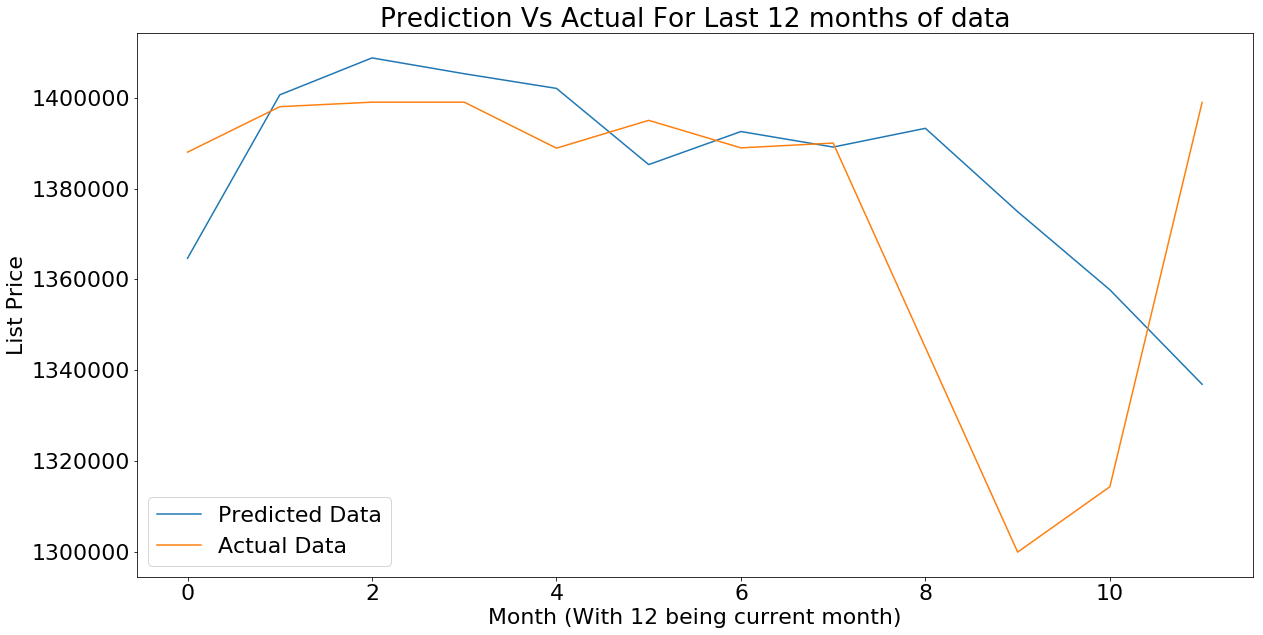

In [117]:
actual_months = list(range(0,len(predictions)))
pred_months = list(range(0,len(predictions)))

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.plot(pred_months,predictions,label='Predicted Data')
plt.plot(actual_months,time_series_vec.values.flatten()[-12:],label='Actual Data')
plt.title('Prediction Vs Actual For Last 12 months of data')
plt.xlabel('Month (With 12 being current month)')
plt.ylabel('List Price')
plt.legend()
plt.show()

These predictions seem reasonable. We will now choose to use this approach (and model) to predict the following 12 months, which we of course do not have data for

In [ ]:
num_months_pred = 12 # Predict 12 months into the future

# Transform data to be stationary
raw_values = time_series_vec.values.flatten()
diff_values = difference(raw_values, 1)
# transform data to be supervised learning
supervised = timeseries_to_supervised(diff_values, 1)
supervised_values = supervised.values

# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(supervised_values)
# Transform into scaled training data
supervised_values = supervised_values.reshape(supervised_values.shape[0], supervised_values.shape[1])
train_scaled = scaler.transform(supervised_values)
test_scaled = [item[0] for item in train_scaled] # Initialize with all data in train

lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)
# walk-forward validation on the test data
predictions = [raw_values[-1]]

for i in range(len(train_scaled)-1,len(train_scaled)+num_months_pred):
    # make one-step forecast
    X = numpy.asarray([test_scaled[i]])
    yhat = forecast_lstm(lstm_model, 1, X)
    test_scaled.append(yhat)
    
    # Invert scaling for prediction
    yhat = invert_scale(scaler, X, yhat)
    # Invert differencing for prediction
    yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
    # Store the prediction in a separate list
    predictions.append(yhat)

In [ ]:
known_months = list(range(0,len(time_series_vec.values.flatten())))
known_months = [month-max(known_months) for month in known_months]
unknown_months = list(range(14))

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 22})
plt.plot(known_months,time_series_vec.values.flatten(),label='Known Data')
plt.plot(unknown_months,predictions,label='Predicted Data')
plt.title('Known Data For this County (including 12 month forecast)')
plt.xticks(np.arange(min(known_months), max(unknown_months)+1, 10))
plt.xlabel('Months (with respect to current month)')
plt.ylabel('List Price')
plt.legend()
plt.show()